# Cili Lado Data Analytics and Machine Learning Project - Group 8
Table of Content:

Step 1: Acquire the dataset

Step 2: Import the libraries

Step 3: Import the dataset

Step 4: Clean the data by identifying and handling missing value, redundancy and outliers

Step 5: Encode the categorical data

Step 6: Feature Scaling

Step 7: Splitting dataset into training and testing sets, train the model and measure the accurancy

Step 8: Random Forest Model

The flowchart of our work are shown in the diagram below.

![FlowChart](CiliLadoData/FlowChart.png)

# Objective
Our objective is to analyze whether the behavior of new customers directly impacts sales



# Step 1: Acquire the dataset

We got the data from this google drive link. https://drive.google.com/drive/folders/16BK8_d1V-A3M1WQ0neaeCwqrHPfzH7QS?usp=sharing . This link is provided by Wei Shen where he got it from Mr.Afiq, who is the founder of Cili Lado.

Not all datasets in google drive have been used, only certain datasets that are relevant to our analysis have been used. The selected datasets are the Product Overview from the Product Folder. 

We download all the dataset into our local drive as a zip file .

![DownloadAll](CiliLadoData/DownloadAll.png)

All the datasets is downloaded in this zip file.

![ZippedFile](CiliLadoData/ZippedFile.png)
![DownloadedFile](CiliLadoData/DownloadedFile.png)

The zip file includes the Product Overview datasets which is from May 2023 to September 2023. Each of them has 22 columns but different number of rows. May, June, July, August, September has 32, 31, 32, 32, 31 rows respectively. The column names are:

1. Date
2. Product Visitors (Visit)
3. Product Page Views
4. Items Visited
5. Product Bounce Visitors
6. Product Bounce Rate
7. Search Clicks
8. Likes
9. Product Visitors (Add to Cart)
10. Units (Add to Cart)
11. Conversion Rate (Add to Cart)
12. Buyers (Placed Order)
13. Units (Placed Order)
14. Items Placed
15. Sales (Placed Order)(MYR)
16. Conversion Rate (Placed Order)
17. Buyers (Confirmed Order)
18. Units (Confirmed Order)
19. Items Confirmed
20. Sales (Confiremd Order)(MYR)
21. Conversion Rate (Confirmed Order)
22. Converison Rate (Placed to Confirmed)

We first combine all the 5 datasets together by copy and paste them into a new Excel File called MergedFile.xlsx.

![CopiedFile](CiliLadoData/CopiedFile.png)

![PasteFile](CiliLadoData/PasteFile.png)

We first combine all 5 datasets together by copying and pasting them into a new Excel File called MergedFile.xlsx.

![MayJune](CiliLadoData/MayJune.png)

To check if the datasets are merged correctly, we calculate the total number of rows from each file, which is 31 + 30 + 31 + 31 + + 30 + 1 = 154. The total is same as our MergedFile, which has 154 rows and this means that the merged file contains all needed data.

However, to fulfill our objective, we require a different set of data sourced from the Dashboard of the year 2023.

![Dashboard2023](CiliLadoData/Dashboard2023.png)

These following columns have been extracted from the Dashboard dataset:

1. Numbers of buyers
2. Numbers of new buyers
3. Numbers of existing buyers

These columns are then being added into the merged file afterwards.

![AddedColumn](CiliLadoData/AddedColumn.png)

While going through the dataset, we found out that the figures in repeat purchase rate numbers are inaccurate. So, we perform data augmentation for two columns: the percentage of new buyers and the percentage of repeat buyers by using the data inside the dataset and Excel Function.

![NewCalculation](CiliLadoData/NewCalculation.png)

![RepeatCalculation](CiliLadoData/RepeatCalculation.png)

We use If in our calculation because if the number of buyer is equal to zero, it might have division by zero error. If the number of buyers equals zero, the output is set to zero, otherwise, the division operation proceeds.  We also convert our calculation to percentage by using this function.

![Percentage](CiliLadoData/Percentage.png)

We decided to complete all these steps in Excel instead of in Python because it is faster. Besides that, we want to make direct changes to our dataset rather than temporary changes only.

Up to now, we have 27 column and 154 rows inside the dataset.

Initially, almost all the data in the Excel file was not numerical data.

![ConvertData](CiliLadoData/ConvertData.png)

Therefore, we converted all the data in the dataset into numerical values by selecting the "Convert to Number" option in Excel to prevent potential errors. You can identify non-numeric data when the left upper corner of the cell is marked in green.

![Number](CiliLadoData/Number.png)

If all the cells are white, it indicates that we have successfully converted the data into numerical values. Now, we can proceed with using Python for data preprocessing steps.

We have also converted the date column to ensure Python recognises it in date format, preventing unintentional calculations. This format ensures proper identification as a date type without triggering any unwanted error.

![Date](CiliLadoData/Date.png)

Now the data can be used for the next few steps.


# Step 2: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Step 3: Import the dataset

We imported the datasets from a local directory. We create a folder called CiliLadoData and store all the datasets and images we use in that folder.

In [2]:
df = pd.read_excel('MergedFile.xlsx')

# Use .info() to show the info of the Excel file
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   153 non-null    datetime64[ns]
 1   Product Visitors (Visit)               153 non-null    int64         
 2   Product Page Views                     153 non-null    int64         
 3   Items Visited                          153 non-null    int64         
 4   Product Bounce Visitors                153 non-null    int64         
 5   Product Bounce Rate                    153 non-null    float64       
 6   Search Clicks                          153 non-null    int64         
 7   Likes                                  153 non-null    int64         
 8   Product Visitors (Add to Cart)         153 non-null    int64         
 9   Units (Add to Cart)                    153 non-null    int64     

In [3]:
# Use print df to show the dataset
print(df)

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                         1                   1              1  \
1   2023-05-02                         3                   6              1   
2   2023-05-03                         4                   7              1   
3   2023-05-04                         1                   3              1   
4   2023-05-05                         3                  10              1   
..         ...                       ...                 ...            ...   
148 2023-09-26                       222                 497              1   
149 2023-09-27                       140                 284              3   
150 2023-09-28                       150                 359              3   
151 2023-09-29                       149                 275              1   
152 2023-09-30                       121                 232              1   

     Product Bounce Visitors  Product Bounce Rate  

In [4]:
# DataFrame for objective 1
df1 = df.copy()

# Remove unwanted data columns that are irrelevant to the analysis
drop_columns = ['Product Bounce Visitors', 'Product Bounce Rate','Likes', 'Product Visitors (Add to Cart)',
       'Units (Add to Cart)', 'Conversion Rate (Add to Cart)','Buyers (Placed Order)', 'Units (Placed Order)', 'Items Placed',
       'Sales (Placed Order) (MYR)', 'Conversion Rate (Placed Order)','Buyers (Confirmed Order)', 'Units (Confirmed Order)',
       'Items Confirmed','Conversion Rate (Confirmed Order)','Conversion Rate (Placed to Confirmed)', 'Numbers of buyers',
       'Numbers of new buyers', 'Numbers of existing buyers','Percentage of new buyers', 'Percentage of repeat buyers']

df1.drop(columns=drop_columns, inplace=True)

display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1,1,1,0,0.00
1,2023-05-02,3,6,1,1,58.90
2,2023-05-03,4,7,1,3,0.00
3,2023-05-04,1,3,1,1,0.00
4,2023-05-05,3,10,1,2,0.00
...,...,...,...,...,...,...
148,2023-09-26,222,497,1,67,1305.30
149,2023-09-27,140,284,3,30,502.69
150,2023-09-28,150,359,3,41,629.92
151,2023-09-29,149,275,1,30,433.53


# Step 4: Clean the data by identifying and handling missing value, redundancy and outliers

After careful consideration, we have opted for **imputation** as our preferred method to handle the outliers instead of removing rows. This decision was made after experimenting with row removal, which resulted in the elimination of 50 rows from the dataset that is already relatively small. Given the trade-off between having a more accurate but smaller dataset versus imputing outliers and retaining more data, we have prioritised preserving a larger dataset for analysis. This choice aims to strike a balance between data accuracy and quantity, acknowledging the importance of maximising information while mitigating the impact of outliers on our analysis.

Additionally, our preference for separately addressing outlier imputation. By treating outliers individually, we aim to prevent the distortion of valuable data in specific columns, ensuring a more targeted and precise approach to maintaining data integrity.

In [5]:
# Determine the missing value of each column by using .isna(), use .sum() to sum all the missing value
print("Find missing value of each column using isna()")
print (df1.isna().sum())

Find missing value of each column using isna()
Date                             0
Product Visitors (Visit)         0
Product Page Views               0
Items Visited                    0
Search Clicks                    0
Sales (Confirmed Order) (MYR)    0
dtype: int64


Based on above output, we found out that there are **no missing value** in the dataset, so we do not need to use .dropna() to delete or drop any row.

In [6]:
# Determine any redundancy in the dataset
# Use .duplicate is to check if there is any duplicate data
duplicate_rows = df1.duplicated().sum()
duplicate_columns = df1.T.duplicated().sum()

print("Find any duplicate values:")
duplicate_rows, duplicate_columns

Find any duplicate values:


(0, 0)

Based on above result, we found out that there are **no duplicate data** in this dataset, so there are no redundancy occur in this datasets.

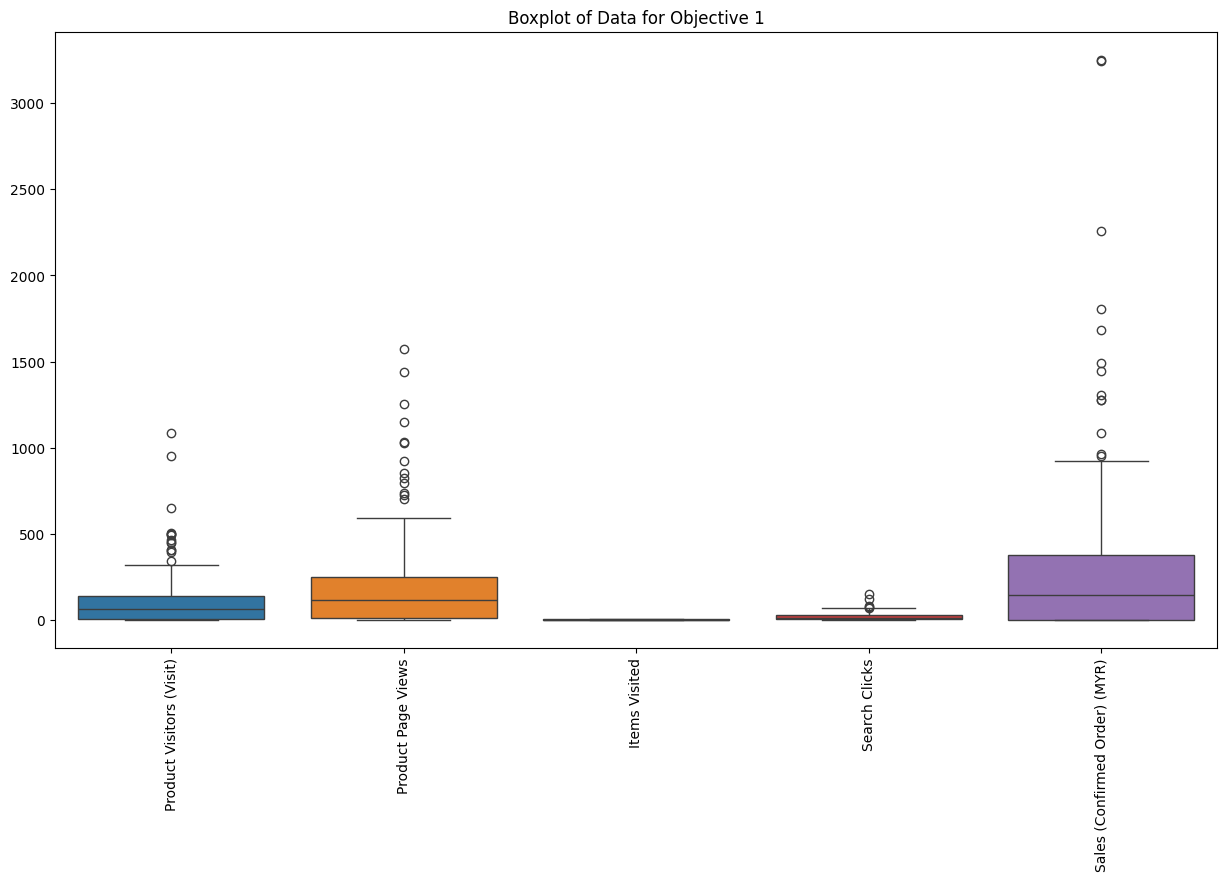

In [7]:
# To check for outliers in the data

# Exclude the 'Date' column
outliersdf = df1.copy()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=outliersdf)
plt.title("Boxplot of Data for Objective 1")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot that used to identify the outliers in the datasets. The circle that all exceeded the horizontal lines are outliers.

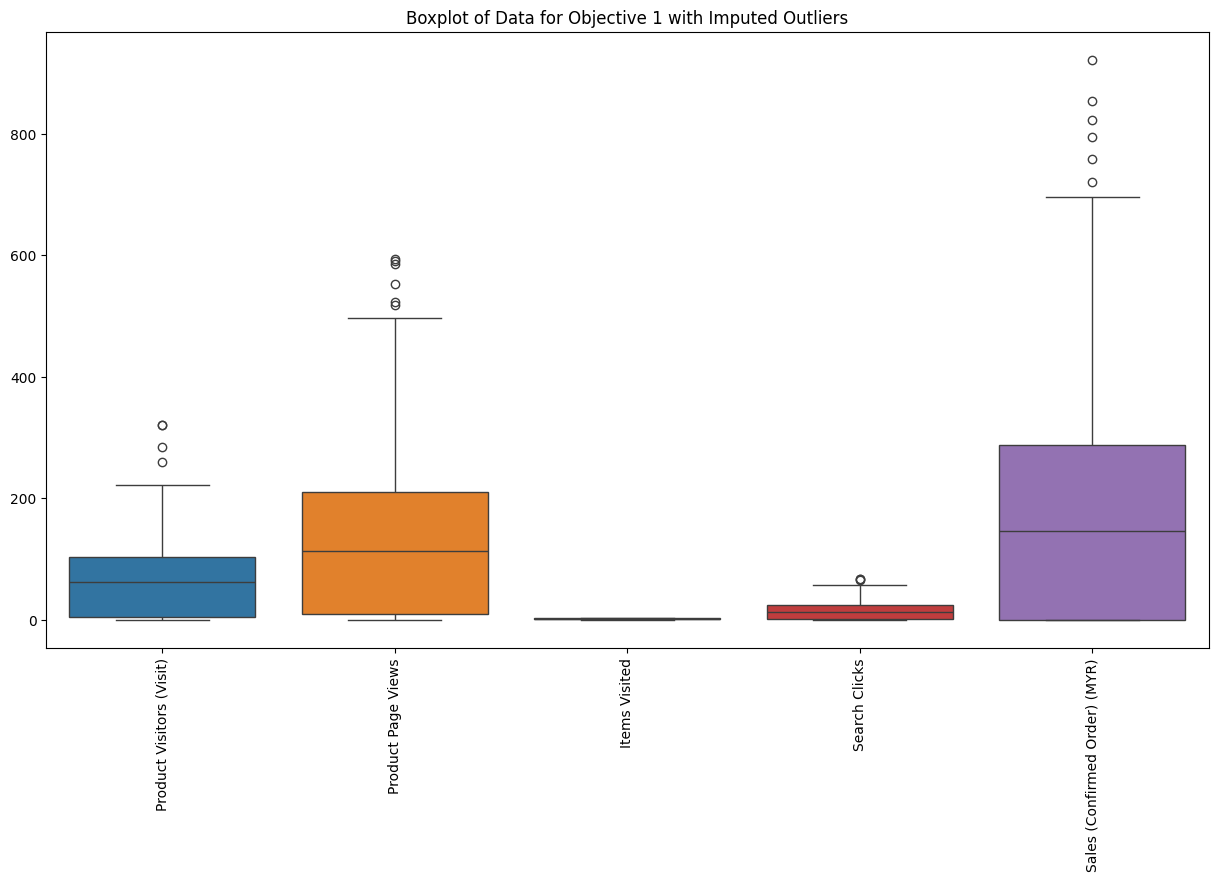

In [8]:
# Assuming 'outliersdf' is your original DataFrame

# Calculate the first quartile (Q1), third quartile (Q3) and interquartile range (IQR)
Q1 = outliersdf.quantile(0.25, numeric_only=True)
Q3 = outliersdf.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Function to replace outliers with the median (or mean)
def impute_outlier_with_median(outliersdf, q1, q3, iqr):
    for col in outliersdf.select_dtypes(include=np.number).columns:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        median_value = outliersdf[col].median()

        # Replace outliers with median (you can also use mean or other metrics)
        outliersdf[col] = np.where((outliersdf[col] < lower_bound) | (outliersdf[col] > upper_bound), median_value, outliersdf[col])
    return outliersdf

# Impute outliers in the DataFrame
df_imputed = impute_outlier_with_median(outliersdf.copy(), Q1, Q3, IQR)

df1 = df_imputed.copy()

# Create a boxplot to visualize the DataFrame with imputed outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_imputed)
plt.title("Boxplot of Data for Objective 1 with Imputed Outliers")
plt.xticks(rotation=90)
plt.show()

The above figure is the boxplot of the dataset after detection and imputation of outliers. The number of circles that all exceeded the horizontal lines are reduced. Also the height of all boxplot had increased but the scale decreased so the range of the column remains the same.

In [9]:
# Now you can display df1 with cleaned data
display(df1)

,Date,Product Visitors (Visit),Product Page Views,Items Visited,Search Clicks,Sales (Confirmed Order) (MYR)
0,2023-05-01,1.0,1.0,1.0,0.0,0.00
1,2023-05-02,3.0,6.0,1.0,1.0,58.90
2,2023-05-03,4.0,7.0,1.0,3.0,0.00
3,2023-05-04,1.0,3.0,1.0,1.0,0.00
4,2023-05-05,3.0,10.0,1.0,2.0,0.00
...,...,...,...,...,...,...
148,2023-09-26,222.0,497.0,1.0,67.0,145.60
149,2023-09-27,140.0,284.0,3.0,30.0,502.69
150,2023-09-28,150.0,359.0,3.0,41.0,629.92
151,2023-09-29,149.0,275.0,1.0,30.0,433.53


Based on the above output, we can observe that the number of rows remains the same since we choose to impute the outliers instead of removing the outliers.

# Step 5: Encode the categorical data
This step is to transform categorical data into numerical data since most of the machine learning model only understand numerical values. However, when dealing with the data in Excel beforehand we can found out that all of the data is numerical except the Date column.

In [10]:
# We need to determine the categorical data inside the dataset first
# However, by observing the dataset it does not have any categorical data but we can double check it by using .dtypes
print(df1.dtypes)

Date                             datetime64[ns]
Product Visitors (Visit)                float64
Product Page Views                      float64
Items Visited                           float64
Search Clicks                           float64
Sales (Confirmed Order) (MYR)           float64
dtype: object


Based on above output, we can observe that all the data is in numerical format so we do not need to do any encoding.

# Step 6: Feature Scaling
Normalise and standardise the range of features in the datasets to guarantee that the machine learning model can work and also help to improve the model's training speed and performance.

We chose to use MinMaxScaler over other scaling methods as it ranges from 0 to 1, providing positive values for our features. This is in contrast to feature scaling, which ranges from -1 to 1. The positive range aligns well with our preference for non-negative values, making MinMaxScaler the suitable choice.

In [11]:
# Extract the date column
date_column = df1.iloc[:, 0]

# Min-Max scale all columns except the date column
minmax_data = MinMaxScaler().fit_transform(df1.iloc[:, 1:])

# Combine the Min-Max scaled data with the date column
minmax_frame = pd.DataFrame(data=minmax_data, columns=df1.columns[1:])
minmax_frame.insert(0, df1.columns[0], date_column)

# Print the datasets after feature scaling
print(minmax_frame)

df1 = minmax_frame.copy()

          Date  Product Visitors (Visit)  Product Page Views  Items Visited   
0   2023-05-01                  0.003115            0.001684       0.333333  \
1   2023-05-02                  0.009346            0.010101       0.333333   
2   2023-05-03                  0.012461            0.011785       0.333333   
3   2023-05-04                  0.003115            0.005051       0.333333   
4   2023-05-05                  0.009346            0.016835       0.333333   
..         ...                       ...                 ...            ...   
148 2023-09-26                  0.691589            0.836700       0.333333   
149 2023-09-27                  0.436137            0.478114       1.000000   
150 2023-09-28                  0.467290            0.604377       1.000000   
151 2023-09-29                  0.464174            0.462963       0.333333   
152 2023-09-30                  0.376947            0.390572       0.333333   

     Search Clicks  Sales (Confirmed Order) (MYR)  

# Step 7: Splitting dataset into training and testing sets, train the model and measure the accurancy

We split the datasets into training and testing set. By referring to the Parento theory, the 80% of the datasets are used for trainig while the remaining 20% of the datasets are used for testing.

The Multiple Linear Regression model below is used to analyze the relationship between the Product Visitors, Product Page Views, Items Visited, Search Clicks and the Sales in confirmed order. Scatter plots are then plotted to visualize the results. The performance metrics such as MAE, MSE, R2 and RMSE are used to assess the performance and effectiveness of the model.



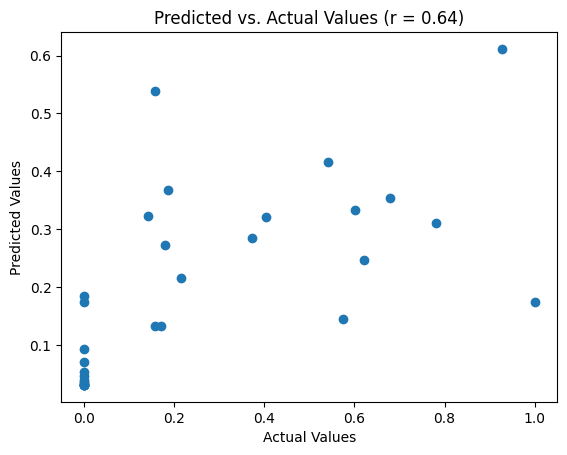

Mean Absolute Error (MAE): 0.16456293274229516
Mean Squared Error (MSE): 0.059701401409852244
R-squared (R2): 0.3617580228341587
Root Mean Squared Error (RMSE): 0.24433870223493503


In [12]:
# Multiple Linear Regression to determine the relationship between the Product Visitors, Product Page Views, Items Visited, Search Clicks and the Sales in confirmed order

# Select independent variable (x) and dependent variable (y)
x_a = df1[['Product Visitors (Visit)','Product Page Views','Items Visited','Search Clicks']]
y_a = df1['Sales (Confirmed Order) (MYR)'] 

# Split the data into training and testing sets
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(x_a,y_a,test_size=0.2, random_state=42)

# Create a linear regression model
model_a = LinearRegression()

# Train the model
model_a.fit(x_train_a, y_train_a)

# Predict the test set result using the trained model
y_pred_a = model_a.predict(x_test_a)

# Plot the graph for the predicted vs actual values
plt.scatter (y_test_a, y_pred_a)
plt.xlabel ('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test_a, y_pred_a)[0], 2))
plt.show()

# Calculate Mean Absolute Error (MAE)
mae_a = mean_absolute_error(y_test_a, y_pred_a)
print(f"Mean Absolute Error (MAE): {mae_a}")

# Calculate Mean Squared Error (MSE)
mse_a = mean_squared_error(y_test_a, y_pred_a)
print(f"Mean Squared Error (MSE): {mse_a}")

# Calculate R-squared (R2)
r2_a = r2_score(y_test_a, y_pred_a)
print(f"R-squared (R2): {r2_a}")

# Calculate Root Mean Squared Error (RMSE)
rmse_a = np.sqrt(mean_squared_error(y_test_a, y_pred_a))
print(f"Root Mean Squared Error (RMSE): {rmse_a}")

In Multiple Linear Regression, the Pearson correlation coefficient is commonly used to assess the relationship between the predicted values and the actual values, rather than measuring the linear relationship between each independent variable and the dependent variable individually, as done in Simple Linear Regression. Also, it is normally called multiple correlation coefficient. 

From this we can see that the result of r = 0.64 indicates that this is a stong positive linear relationship between the predicted values and the actual values. 

The R-squared value of 0.3617 reveals that approximately 36.17% of the total variability in sales can be explained by the variation in the percentage of new and repeat buyers. However, the presence of other unaccounted factors contributes to the remaining 63.83% of variability.

The Mean Absolute Error (MAE: 0.1646), Mean Squared Error (MSE: 0.0597), and Root Mean Squared Error (RMSE: 0.2443) are all relatively low, suggesting reasonable predictive accuracy.

The valuable insights derived from this graph indicate a significant correlation between sales and the number of items visited, as well as product page views on Shopee. Evidently, optimizing the online shopping experience by enhancing both product page views and the number of visits strongly correlates with increased sales. To capitalize on this relationship, Cili Lado should consider investing in strategies that make their Shopee storefront more visually appealing and engaging for potential customers.

After several training and testing of various machine learning models, we can conclude that RNN model has better performance compared to multiple linear regression model and is the ideal model for our project. It has lower MAE, MSE, RMSE and higher R-squared compared to multiple linear regression. The model is more accurate and has better metrics since date is also one of the most important factors in business.

# Step 10: Random Forest Model
All the Multiple Linear Regression create above had shown that customer behaviour is important. However, in the realm of business, where resources such as capital, time, and effort are constrained, strategic prioritization becomes crucial. Therefore, Random Forest Model is used. 

It can capture non-linear relationships that Multiple Linear Regression might miss. This could reveal more complex patterns in how customer behaviors interact to influence sales, allowing for better marketing strategies.

Also, it is more robust to outliers than Multiple Linear Regression, possibly providing a more accurate picture of the sales drivers because the data has outliers and is not normally distributed.

With a better understanding of what drives sales because of feature importance, Cili Lado can create more targeted strategies. For instance, if Search Click is a key feature, Cili Lado might work to create more engaging content to keep customers clicking into its page.


Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py",

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


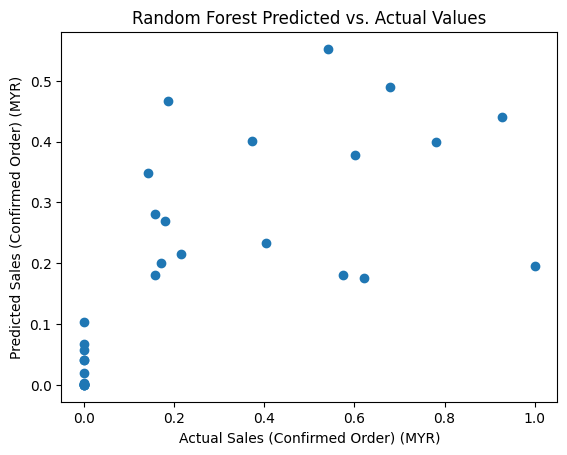

Random Forest Mean Absolute Error (MAE): 0.1363301268986781
Random Forest Mean Squared Error (MSE): 0.05378708833670329
Random Forest R-squared (R2): 0.42498539740566155
Random Forest Root Mean Squared Error (RMSE): 0.23192043535812726


In [56]:
x_10 = pd.concat([df1[['Product Visitors (Visit)', 'Product Page Views', 'Items Visited', 'Search Clicks']],
               df2[['Percentage of new buyers', 'Percentage of repeat buyers']]], axis=1)

# Target variable
y_10 = df1['Sales (Confirmed Order) (MYR)']

x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x_10, y_10, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model_rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train_10, y_train_10)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best parameters to create a new model
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)

# Train the model
best_rf.fit(x_train_10, y_train_10)

# Predict the test set result using the trained model
y_pred_rf = best_rf.predict(x_test_10)

# Plotting the predicted vs actual values for Random Forest Model
plt.scatter(y_test_10, y_pred_rf)
plt.xlabel('Actual Sales (Confirmed Order) (MYR)')
plt.ylabel('Predicted Sales (Confirmed Order) (MYR)')
plt.title('Random Forest Predicted vs. Actual Values')
plt.show()

# Calculate and print the performance metrics for Random Forest Model
mae_rf = mean_absolute_error(y_test_10, y_pred_rf)
mse_rf = mean_squared_error(y_test_10, y_pred_rf)
r2_rf = r2_score(y_test_10, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")


We use a search grid and calculate the best parameters for the random forest. This is better because it does not require manually testing and it is more comprehensive and faster. Here are some of the parameters in random forest.

1. n_estimators: The number of trees in the forest. Generally, more trees increase performance and decrease the risk of overfitting, but also increase computational cost.

2. max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns but can lead to overfitting.

3. min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that only fit a small number of instances.

4. min_samples_leaf: The minimum number of samples required to be at a leaf node. Setting this higher can smooth the model, especially for regression.

5. max_features: The number of features to consider when looking for the best split. Trying different values can affect both performance and overfitting.


In [57]:
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Train the model
best_rf_model.fit(x_train_10, y_train_10)

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(x_test_10)


After got the best parameters in the search grid, we generate the feature importance of each factor.

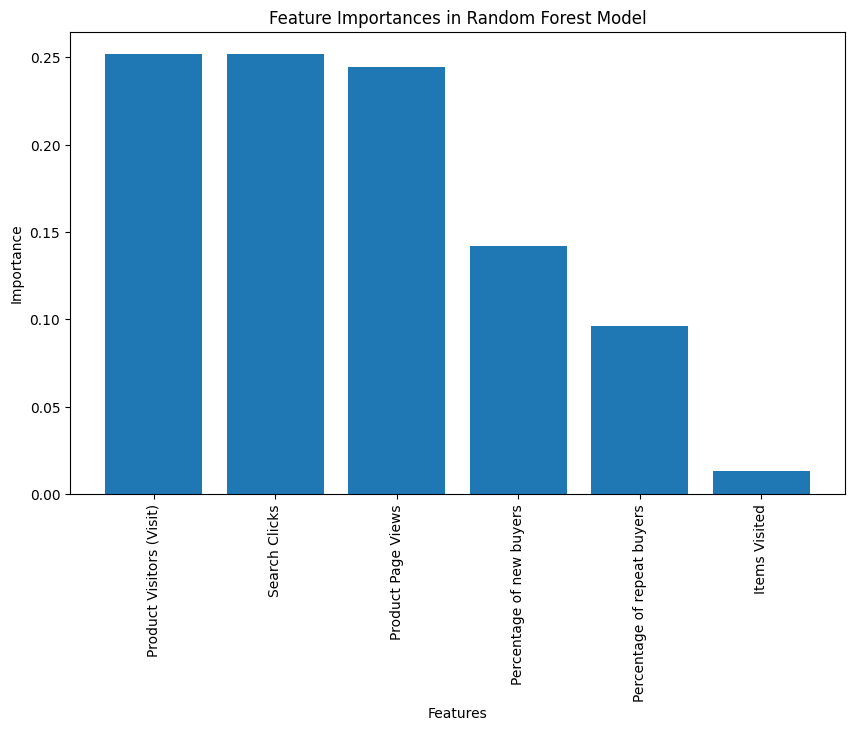

Feature Importances:
                       Feature  Importance
0     Product Visitors (Visit)    0.251914
3                Search Clicks    0.251849
1           Product Page Views    0.244263
4     Percentage of new buyers    0.142118
5  Percentage of repeat buyers    0.096425
2                Items Visited    0.013431


In [58]:
feature_importances = best_rf_model.feature_importances_
features = x_10.columns  # Make sure this refers to the correct DataFrame used for training the model
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Plotting Feature Importances
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.xticks(rotation=90)
plt.show()

print("Feature Importances:")
print(importance_df)


We found out that Product Visitors (Visit), Search Clicks and Product Page Views are the top 3 most important feature that is related to sales. 

Therefore, by this graph Cili Lado should focus on the marketing side to increase Product Visitors and Search Clicks first as this 2 is the most important factor on increasing its sales.

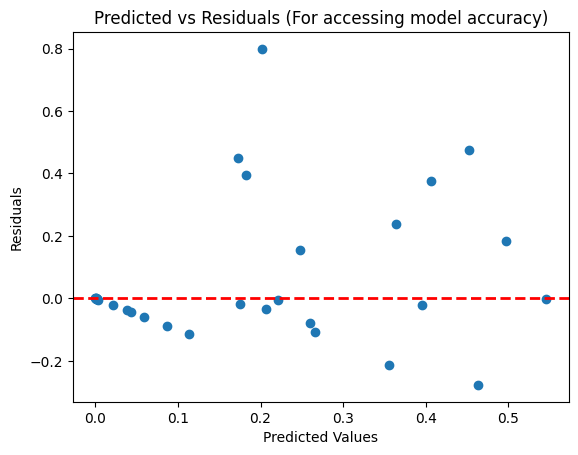

In [31]:
# Plot the graph for residuals

# Calculate residuals
residuals_rf = y_test_10 - y_pred_rf

# Plot residuals against predicted values
plt.scatter(y_pred_rf, residuals_rf)
plt.title('Predicted vs Residuals (For accessing model accuracy)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.show()

The graph above show the relationship between predicted values and residuals that can help us to access how well the trained model predicts outcomes. Predicted values are what the model thinks the result should be, while the residuals are the differences between the predictions and the actual values. 

Some of the data points are far from 0.0, indicating the model's predictions are sometimes higher and sometimes lower than the actual values. This variation might influenced by the external variables such as the promotional activity occur from time to time, change in customer behaviour, competition dynamics and economic changes that can impact sales unpredictably.

Based on the above residuals plot, we can observe that the residuals have a more uniform scatter across the entire range of predicted values.

This residuals plot is **considered slightly better** than the one above because the residuals are more evenly distributed around the zero line and the model is equally likely to overestimate and underestimate throughout the entire prediction range. In addition, the vertical distribution in the middle is smaller, indicating higher prediction accuracy for these points.

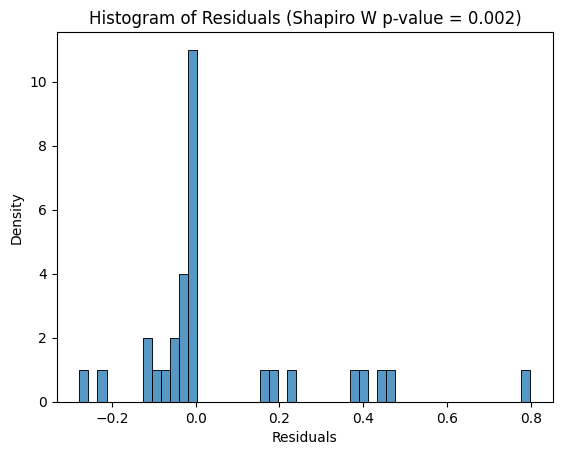

In [32]:
# Create a density plot of the residuals, bins is number of bars
sns.histplot((y_test_10 - y_pred_rf), bins = 50)
plt.xlabel ('Residuals')
plt.ylabel('Density')

# 1 is the position of the variable, 0 is test statistic, 1 is p-value
plt.title ('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test_a - y_pred_a)[1]))
plt.show()

# P-value is 0.000, which is less than 0.05, so it is against the idea you are testing, so it is not normally distributed

The Shapiro-Wilk test is used to assess whether the sample data fits a normal distribution. The histogram of residuals above have a p-value of **0.002** suggests that the residuals are not normally distributed but it is **slightly better** than the one above which have a p-value of 0.000. In addition, the distribution deviation might be **less severe** compared to the one above.

# Step 11: Summary
For Part A, the important findings are listed below:

1. Optimize the Shopee Experience: Elevate the platform's design interface and experience on Shopee to attract customers, directly influencing sales. Conduct testing across various layouts, designs, and call-to-action placements to foster increased page views and visits, thereby enhancing the overall Shopee shopping experience. 

2. Search Optimization: Given the significance of search clicks as a featured importance, it becomes crucial to optimize the search functionality. To stand out among competitors, consider implementing standout graphics or design to prompt users to click on Cili Lado. By combining functionality with eye-catching aesthetics, the aim is to not just meet but exceed user expectations, by increasing clicks and heightened user satisfaction.

For Part B, the important findings are as follows:

1. Loyalty Programs: If repeat customers significantly contribute to sales, developing a loyalty program or subscription model could enhance customer retention rates. Also, improve the flavour or increase more flavour which make the repeat customer come back for more.

2. Targeted Marketing: Create different marketing campaigns for new and existing customers. Survey can be taken to analyse the age or customer peference for better improvement on marketing strategies.

The following are the key findings for all combined model:

1. Holistic Marketing Strategy: This combined model can identify which factors have the most significant impact on sales. Focus on the part then move on to the next most important feature. By knowing the combined effect, Cili Lado can prioritize which aspects of the customer experience need improvement to boost sales.

2. Product Development and Inventory Management: By understanding the full customer journey from initial visit to repeat purchase, you can make informed decisions about product development and inventory management to ensure that Cili Lado is meeting customer demand.

3. Resource Allocation: For certain features, like product visitors and search click, have a stronger relationship with sales, Cili Lado can allocate more resources to improve these areas. For instance, create higher quality marketing video or graphics to attract customer.


However, all the methods above are the most direct methods to increase page views. But, it has other indirect methods to increase page views. We had find a large amount of research and done some interviewing with our finance and bussiness students in Taylor's University. Here are some of the methods:

1. Competitor Analysis: When searching for sambal in Shopee. Cili Lado is also one of the 8 options showed. A thorough examination of successful competitors reveals some key factors. We found out that they had multiple flavours or options to buy. If there are only 2 choices, the choices are Spicy and Less Spicy only. It is recommended for Cili Lado to enhance its product offerings by introducing a variety of flavors. Specifically, shifting from the current categorization of "Red and Green" to a more consumer-friendly "Spicy and Less Spicy" classification could significantly improve user understanding. The success of the sambal with 2.2 million sales is because of its influential presence on TikTok. This highlights the statement that relying solely on Shopee may not be potent enough for achieving such remarkable sales figures.

2. Exposure: Broadening the brand's presence across diverse platforms, such as XiaoHongShu, Facebook, and Instagram, serves as a strategic move. Simultaneously, tapping into offline avenues, like participating in Food Fairs or Road Shows, presents an opportunity to engage with potential customers directly. This comprehensive strategy aims to achieve two primary objectives: First, increasing brand awareness among a wider audience, and second, attracting new customers through offline events. By creating an online and offline presence, Cili Lado can be established as a strong brand identity. The ultimate goal is to channel this heightened visibility into increased sales on platforms like Shopee. This interconnected approach ensures that the brand resonates with a broader demographic, drawing attention to Cili Lado and ultimately driving a surge in online sales through strategic exposure efforts. 

3. Add value and identity: Add the message that Cili Lado are handcrafted and created with care. This can be emphasized through marketing messages, labeling, or packaging, reinforcing the idea that Cili Lado is not solely just a food but a healthy culinary experience crafted with dedication and attention to detail. Incorporating these enhancements not only adds value to the product itself but also contributes to building a strong brand identity, fostering customer loyalty and attracting new patrons seeking unique and quality offerings. For instance, highlighting the vegan nature of the sambal in the Shopee description can be extended as an invitation for vegetarians to savor the unique flavors of Cili Lado.

I know you spice things up, waht about the chili, blog, influencer
4 year ago, law student MMU end up doing business homemade sambal minang homemade sumatera, sister in law, recipe authentic, testing very good want to do business, start behind kitchen in house, slowly open small factory in melaka, pandemic, 2020 first gen product label  sencod 2021 recent 2022 small factory 2023 studio sell product shope live whats face insta onpay tiktok laz sho, 186 in shopee 3 years, reveal then viral, link to shopee, 100 bottle comapre to 3 year 186 , one step further facebook, apointed ambasador, june 3 months ago until now 2k bottle, spread of the product, sambal not too spicy lots of flavour, lime, limau kasturi, when you eat you cant stop want to eat more, perfect recepi of sambal, shopee from sabah to kelantan, 13 individual spreading the flavour , conculsion power of passion, colab and invoation. while keeping things light and fun. this is a story of how a tradisional recipe with dedication can capture the hearts and taste bud of malaysian across the country.

 onpay selling offline direct to custoemr, not friendly on shopee lazada tiktok, facebook wahts instagram have database testimoni engament followers shopee keep the privacy info, no age gender locality and peak time sale more on night during 8 - 12 on its own analysis, we didnt know by day month year only know total we need to enchan more the data given by shopee tiktok not very good veggie friendly ,red is more spicier than green, nervous and sweating, make it more fun, we are quite inspired, 90 precent sales in shopee, shopee civer 90 percent discont, price today is rm4.20 in live that day is 9.25 again proof. 
 
 first is data collection advice him on how to improve, marketing strat, propose any other platform, focus on more how we do the caimpagine, marketing campaign, what is the aim we want target both but we want our customer to become regular customer and consistent, aim to engage with them, priro is to boost our sales and maintain customer like regular customer, age of our customer, when we know the age can do a more targeted campaign based on age. if majority campain is youngsets do a more targeted campaign on the youngeserts more influence to them, we can give them a survey to get info and age. 30 to 50 age. mostly shopee no lazada  from cili man facebook then to shopee we offer form tiktok and lazada but didnt get much attraction we can help promote someone promoting in shopee affored 4 to 5 now is getting down to 1.8 to 2 but didnt know who did it or who promoting it, know the name but cant communicate with them. 2.2 is malay sambal they put sugar taste good nice but have sugar, diet guy you will opt for sambal taht doesnt have sugar, level of spiness he is very spicy, itchy on head, it doesnt reach lvl for ours a bit is red, help to get data and how to use it to engage with marketing and adv 